In [1]:
# Import necessary libraries for data manipulation, visualization, and text formatting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

Upload the ford bike dataset


In [2]:
# Download and Extract the ford bike data
!wget https://s3.amazonaws.com/fordgobike-data/201904-fordgobike-tripdata.csv.zip -O 201904-fordgobike-tripdata.csv.zip
!unzip 201904-fordgobike-tripdata.csv.zip

--2025-03-13 13:34:15--  https://s3.amazonaws.com/fordgobike-data/201904-fordgobike-tripdata.csv.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.37.64, 52.216.176.133, 3.5.12.183, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.37.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9110417 (8.7M) [application/zip]
Saving to: ‘201904-fordgobike-tripdata.csv.zip’

201904-fordgobike-t 100%[===================>]   8.69M  54.2MB/s    in 0.2s    

2025-03-13 13:34:15 (54.2 MB/s) - ‘201904-fordgobike-tripdata.csv.zip’ saved [9110417/9110417]

Archive:  201904-fordgobike-tripdata.csv.zip
replace 201904-fordgobike-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Data Representation

In [3]:
# Read and load the dataset
df = pd.read_csv('201904-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368.0,Myrtle St at Polk St,37.785434,-122.419622,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,2749,Subscriber,1989.0,Female,No
1,53725,2019-04-30 20:43:41.6320,2019-05-01 11:39:06.9170,246.0,Berkeley Civic Center,37.869060,-122.270556,241.0,Ashby BART Station,37.852477,-122.270213,2608,Customer,NaN,NaN,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64.0,5th St at Brannan St,37.776754,-122.399018,64.0,5th St at Brannan St,37.776754,-122.399018,258,Subscriber,1993.0,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,89.0,Division St at Potrero Ave,37.769218,-122.407646,1974,Subscriber,1972.0,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124.0,19th St at Florida St,37.760447,-122.410807,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,877,Subscriber,1973.0,Male,No


In [4]:
# Display column data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             239111 non-null  int64  
 1   start_time               239111 non-null  object 
 2   end_time                 239111 non-null  object 
 3   start_station_id         239047 non-null  float64
 4   start_station_name       239047 non-null  object 
 5   start_station_latitude   239111 non-null  float64
 6   start_station_longitude  239111 non-null  float64
 7   end_station_id           239047 non-null  float64
 8   end_station_name         239047 non-null  object 
 9   end_station_latitude     239111 non-null  float64
 10  end_station_longitude    239111 non-null  float64
 11  bike_id                  239111 non-null  int64  
 12  user_type                239111 non-null  object 
 13  member_birth_year        227912 non-null  float64
 14  memb

In [5]:
# Convert columns data types for easier analysis
df['member_birth_year']=df['member_birth_year'].astype('Int64')

df['start_station_id'] = df['start_station_id'].astype('Int64')
df['end_station_id'] = df['end_station_id'].astype('Int64')

df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

In [6]:
# Check for data types after converting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239111 entries, 0 to 239110
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             239111 non-null  int64   
 1   start_time               239111 non-null  object  
 2   end_time                 239111 non-null  object  
 3   start_station_id         239047 non-null  Int64   
 4   start_station_name       239047 non-null  object  
 5   start_station_latitude   239111 non-null  float64 
 6   start_station_longitude  239111 non-null  float64 
 7   end_station_id           239047 non-null  Int64   
 8   end_station_name         239047 non-null  object  
 9   end_station_latitude     239111 non-null  float64 
 10  end_station_longitude    239111 non-null  float64 
 11  bike_id                  239111 non-null  int64   
 12  user_type                239111 non-null  category
 13  member_birth_year        227912 non-null  In

In [7]:
# Number of rows and columns
df.shape

(239111, 16)

In [8]:
# Search for youngest and oldest member
min=df['member_birth_year'].min()
max=df['member_birth_year'].max()
# Display details of youngest members
df.loc[df['member_birth_year'] == max]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
11719,1641,2019-04-29 12:16:20.9180,2019-04-29 12:43:42.8290,66,3rd St at Townsend St,37.778742,-122.392741,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,1473,Customer,2001,Male,No
11721,1646,2019-04-29 12:15:56.1760,2019-04-29 12:43:22.7790,66,3rd St at Townsend St,37.778742,-122.392741,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,3048,Customer,2001,Male,No
11722,1592,2019-04-29 12:16:45.3020,2019-04-29 12:43:17.9190,66,3rd St at Townsend St,37.778742,-122.392741,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,1552,Customer,2001,Male,No
11874,1932,2019-04-29 11:29:42.9760,2019-04-29 12:01:55.8430,386,24th St at Bartlett St,37.752105,-122.419724,80,Townsend St at 5th St,37.775235,-122.397437,1482,Customer,2001,Male,No
11875,1917,2019-04-29 11:29:29.3650,2019-04-29 12:01:26.9380,386,24th St at Bartlett St,37.752105,-122.419724,80,Townsend St at 5th St,37.775235,-122.397437,416,Customer,2001,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211117,832,2019-04-03 19:00:49.3630,2019-04-03 19:14:41.7610,383,Golden Gate Ave at Franklin St,37.780787,-122.421934,324,Union Square (Powell St at Post St),37.788300,-122.408531,1909,Subscriber,2001,Male,No
214164,727,2019-04-03 16:38:31.6990,2019-04-03 16:50:38.7110,200,2nd Ave at E 18th St,37.800214,-122.253810,203,Webster St at 2nd St,37.795195,-122.273970,4869,Customer,2001,Male,No
215696,628,2019-04-03 13:17:57.0620,2019-04-03 13:28:25.3910,370,Jones St at Post St,37.787327,-122.413278,23,The Embarcadero at Steuart St,37.791464,-122.391034,4641,Subscriber,2001,Male,No
234196,1970,2019-04-01 14:03:56.8840,2019-04-01 14:36:47.5360,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,323,Broadway at Kearny,37.798014,-122.405950,6258,Customer,2001,Male,No


In [9]:
# Check for duplicated data
df.duplicated().sum()

0

In [10]:
# Check for the sum of all missing values
df.isnull().sum()

,0
duration_sec,0
start_time,0
end_time,0
start_station_id,64
start_station_name,64
start_station_latitude,0
start_station_longitude,0
end_station_id,64
end_station_name,64
end_station_latitude,0


In [11]:
# Count the number of missing member birth year for each user type
df.groupby('user_type')['member_birth_year'].apply(lambda x: x.isna().sum())

<ipython-input-11-2c856a4860d5>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('user_type')['member_birth_year'].apply(lambda x: x.isna().sum())


,member_birth_year
user_type,
Customer,6512
Subscriber,4687


In [12]:
# Drop all null values in member birth year
df.dropna(subset=['member_birth_year'],inplace=True)

In [13]:
# Check for null values after dropping
df.isna().sum()

,0
duration_sec,0
start_time,0
end_time,0
start_station_id,64
start_station_name,64
start_station_latitude,0
start_station_longitude,0
end_station_id,64
end_station_name,64
end_station_latitude,0


In [14]:
# Overview of number of unique birth years
df['member_birth_year'].unique()

<IntegerArray>
[1989, 1993, 1972, 1973, 1997, 1976, 1986, 1995, 1984, 1992, 1994, 1990, 1987,
 1971, 1991, 1977, 1979, 1964, 1981, 1965, 1980, 1996, 1985, 1968, 1982, 1988,
 1969, 1983, 1998, 1999, 1967, 1974, 1963, 1978, 1966, 1975, 2000, 1970, 1960,
 1958, 1961, 1959, 1957, 1954, 1955, 1962, 1896, 1949, 1952, 1950, 1948, 1956,
 1953, 1951, 1947, 1900, 1946, 1902, 1941, 1933, 2001, 1943, 1923, 1920, 1931,
 1935, 1942, 1938, 1945, 1934, 1944, 1911, 1901, 1932, 1878, 1939, 1886, 1904]
Length: 78, dtype: Int64

In [15]:
# Display count of birth years for each year
df['member_birth_year'].value_counts()

,count
member_birth_year,
1988,13319
1989,12443
1990,12068
1991,11894
1993,11408
...,...
1932,2
1904,2
1934,1


In [16]:
# Drop rows with missing values in station ID and name columns, as they are essential for trip analysis
df.dropna(subset=['start_station_id','start_station_name','end_station_id','end_station_name'],inplace=True,axis=0)

In [17]:
# Remove station latitude and longitude columns as they won't be needed for this analysis
df.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude', 'end_station_longitude'],inplace=True,axis=1)

In [18]:
# Check for any more missing values
df.isnull().sum()

,0
duration_sec,0
start_time,0
end_time,0
start_station_id,0
start_station_name,0
end_station_id,0
end_station_name,0
bike_id,0
user_type,0
member_birth_year,0


In [19]:
# View the dataset after cleaning
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,50305,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368,Myrtle St at Polk St,324,Union Square (Powell St at Post St),2749,Subscriber,1989,Female,No
2,78072,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64,5th St at Brannan St,64,5th St at Brannan St,258,Subscriber,1993,Male,No
3,78969,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67,San Francisco Caltrain Station 2 (Townsend St...,89,Division St at Potrero Ave,1974,Subscriber,1972,Male,No
4,1128,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124,19th St at Florida St,5,Powell St BART Station (Market St at 5th St),877,Subscriber,1973,Male,No
5,1388,2019-04-30 23:53:05.9820,2019-05-01 00:16:14.3130,243,Bancroft Way at College Ave,247,Fulton St at Bancroft Way,3234,Customer,1997,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...
239106,184,2019-04-01 00:09:17.5660,2019-04-01 00:12:22.5170,133,Valencia St at 22nd St,132,24th St at Chattanooga St,6430,Subscriber,1976,Male,No
239107,539,2019-04-01 00:03:02.5730,2019-04-01 00:12:02.0670,78,Folsom St at 9th St,77,11th St at Natoma St,4972,Subscriber,1981,Male,Yes
239108,292,2019-04-01 00:06:04.2370,2019-04-01 00:10:56.9850,243,Bancroft Way at College Ave,269,Telegraph Ave at Carleton St,3415,Subscriber,1997,Male,Yes
239109,471,2019-04-01 00:01:38.4110,2019-04-01 00:09:29.9650,370,Jones St at Post St,43,San Francisco Public Library (Grove St at Hyde...,5018,Subscriber,1996,Female,Yes


In [20]:
# Convert trip duration from seconds to minutes for easier interpretation
df['duration_in_minutes']=df['duration_sec']/60

In [21]:
# Drop duration in seconds column as it will not be needed
df.drop(['duration_sec'], inplace=True, axis=1)

In [22]:
# Convert birth year to age for easier analysis and more clarity
df['Age']=2025-df['member_birth_year']

In [23]:
# Display dataset after to verify all changes
df

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_in_minutes,Age
0,2019-04-30 22:33:55.1550,2019-05-01 12:32:20.4540,368,Myrtle St at Polk St,324,Union Square (Powell St at Post St),2749,Subscriber,1989,Female,No,838.416667,36
2,2019-04-30 10:32:46.4890,2019-05-01 08:13:58.9750,64,5th St at Brannan St,64,5th St at Brannan St,258,Subscriber,1993,Male,No,1301.200000,32
3,2019-04-30 10:00:51.5500,2019-05-01 07:57:01.2620,67,San Francisco Caltrain Station 2 (Townsend St...,89,Division St at Potrero Ave,1974,Subscriber,1972,Male,No,1316.150000,53
4,2019-04-30 23:59:04.7390,2019-05-01 00:17:53.0910,124,19th St at Florida St,5,Powell St BART Station (Market St at 5th St),877,Subscriber,1973,Male,No,18.800000,52
5,2019-04-30 23:53:05.9820,2019-05-01 00:16:14.3130,243,Bancroft Way at College Ave,247,Fulton St at Bancroft Way,3234,Customer,1997,Male,No,23.133333,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239106,2019-04-01 00:09:17.5660,2019-04-01 00:12:22.5170,133,Valencia St at 22nd St,132,24th St at Chattanooga St,6430,Subscriber,1976,Male,No,3.066667,49
239107,2019-04-01 00:03:02.5730,2019-04-01 00:12:02.0670,78,Folsom St at 9th St,77,11th St at Natoma St,4972,Subscriber,1981,Male,Yes,8.983333,44
239108,2019-04-01 00:06:04.2370,2019-04-01 00:10:56.9850,243,Bancroft Way at College Ave,269,Telegraph Ave at Carleton St,3415,Subscriber,1997,Male,Yes,4.866667,28
239109,2019-04-01 00:01:38.4110,2019-04-01 00:09:29.9650,370,Jones St at Post St,43,San Francisco Public Library (Grove St at Hyde...,5018,Subscriber,1996,Female,Yes,7.850000,29


In [24]:
# Count the occurrences for each category in bike share for all
df['bike_share_for_all_trip'].value_counts()

,count
bike_share_for_all_trip,
No,207208
Yes,20640


# **Data Analysis Questions**

# What are the most popular start and end stations (id and name)?


In [25]:
# Check for the top 5 most used start station name and id
most_start_stations=df[['start_station_name','start_station_id']].value_counts().head(5)
most_start_stations

,,count
start_station_name,start_station_id,
San Francisco Caltrain Station 2 (Townsend St at 4th St),67,4669
Market St at 10th St,58,4288
San Francisco Ferry Building (Harry Bridges Plaza),15,3919
Berry St at 4th St,81,3624
Montgomery St BART Station (Market St at 2nd St),21,3345


In [26]:
# # Check for the top 5 most used end station name and id
most_end_stations=df[['end_station_name','end_station_id']].value_counts().head(5)
most_end_stations

,,count
end_station_name,end_station_id,
San Francisco Caltrain Station 2 (Townsend St at 4th St),67,6792
San Francisco Ferry Building (Harry Bridges Plaza),15,4525
Montgomery St BART Station (Market St at 2nd St),21,4353
Market St at 10th St,58,4328
Berry St at 4th St,81,3550


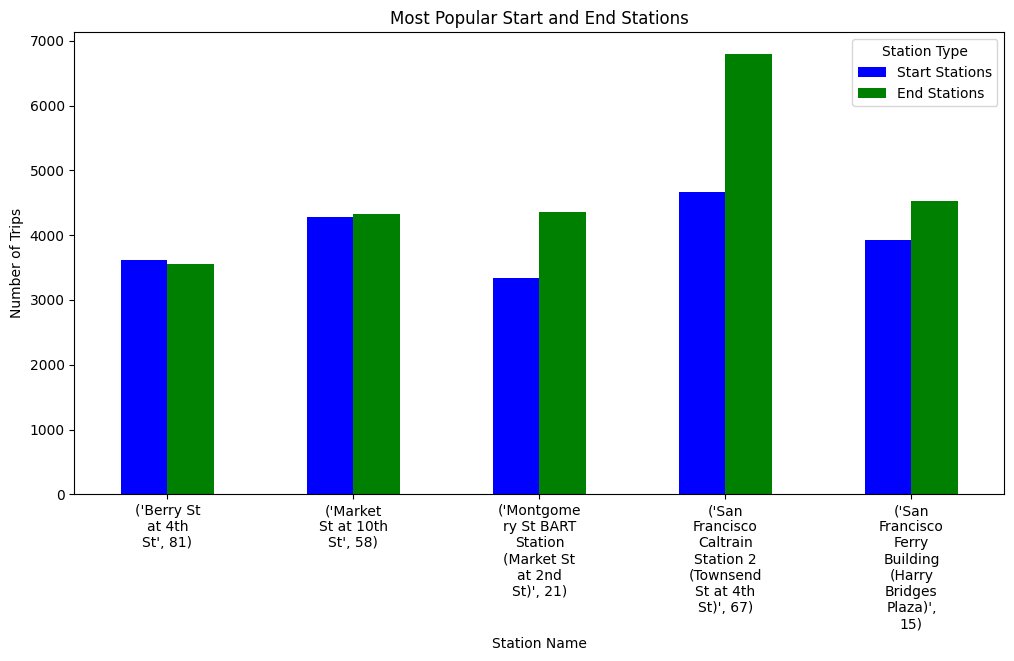

In [27]:
# Create a dataframe to compare top 5 most popular start and end stations
stations=pd.DataFrame({'Start Stations':most_start_stations,
                       'End Stations': most_end_stations})
# Format station names for better readability
stations.index = stations.index.map(lambda x: '\n'.join(textwrap.wrap(str(x), width=10)))

# Plot a bar chart for the number of station names and number of trips
stations.plot(kind='bar', figsize=(12,6), color=['blue', 'green'])
plt.title('Most Popular Start and End Stations')
plt.xlabel('Station Name')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.legend(title="Station Type")
plt.show()

# what is the most used bike and how many are there?


Number of Bikes

In [28]:
# Calculate number of unique bikes in the data
df['bike_id'].nunique()

4503

Most used bike

In [29]:
# Calculate number of rides for the most used bike
count=df['bike_id'].value_counts().max()
most_used_bike = df['bike_id'].value_counts().idxmax()
print(f"Most used bike ID: {most_used_bike}, Number of rides: {count}")

Most used bike ID: 3750, Number of rides: 139


# Which gender has the highest number of rides?


In [30]:
# Count for each gender category
df['member_gender'].value_counts()

,count
member_gender,
Male,168093
Female,55484
Other,4271


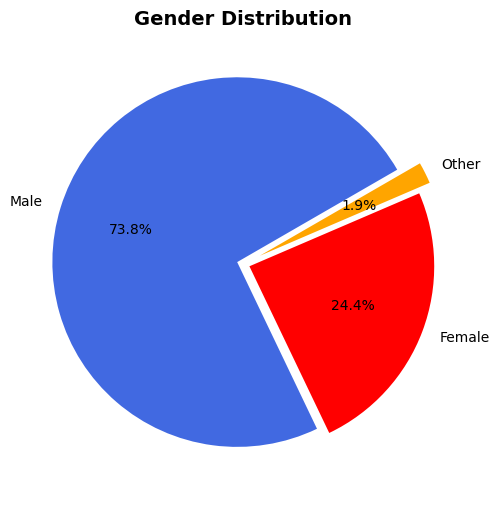

In [31]:
# Plot a pie chart to visualize the gender distribution of bike members
df['member_gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), colors=['royalblue','red','orange'],explode=[0.035, 0.035, 0.1],startangle=30)
# Add title and format labels
plt.title('Gender Distribution',fontweight='bold',fontsize=14)
plt.ylabel('')
plt.show()

# What is the Average trip duration for customers and subscribers?

In [32]:
# Average trip duration
df['duration_in_minutes'].mean()

12.861289543906464

In [33]:
# Average trip duration for subs and customers
df.groupby('user_type')['duration_in_minutes'].mean()

<ipython-input-33-f753842e4535>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('user_type')['duration_in_minutes'].mean()


,duration_in_minutes
user_type,
Customer,23.727842
Subscriber,11.254556


#Which day of the week has the most trips?

In [34]:
# convert start time to a date time format
df['start_time'] = pd.to_datetime(df['start_time'])

# Extract the day of the week from 'start_time' to analyze trip patterns
DayOfTheWeek=df['start_day']=df['start_time'].dt.day_name()

# Count the number of trips for each day
trips_count=df['start_day'].value_counts()
trips_count

,count
start_day,
Tuesday,41856
Monday,39296
Thursday,37234
Wednesday,37222
Friday,33733
Saturday,21475
Sunday,17032


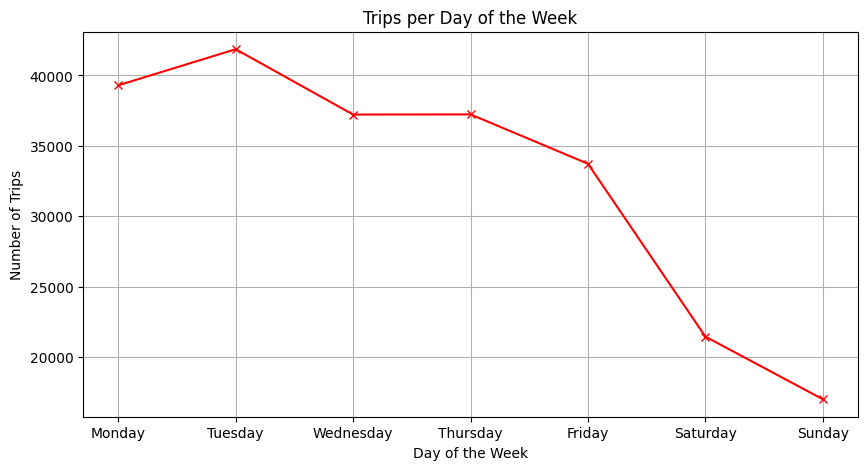

In [35]:
# Extract the day of the week from 'start_time'
df['week_day'] = df['start_time'].dt.day_name()
trips_per_day=df.groupby('week_day').size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the number of trips per day as a line chart
trips_per_day.plot(kind='line',figsize=(10,5),color='red',marker='x')
plt.title('Trips per Day of the Week')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trips")

# Add a grid for better visualization
plt.grid(True)
plt.show()

# Which category ("Yes" or "No") for bike_share_for_all_trip has longer rides on average?


In [36]:
# Calculate the average trip duration (in minutes) for each bike share category
triptime=df.groupby('bike_share_for_all_trip')['duration_in_minutes'].mean()
triptime

,duration_in_minutes
bike_share_for_all_trip,
No,13.020466
Yes,11.263293


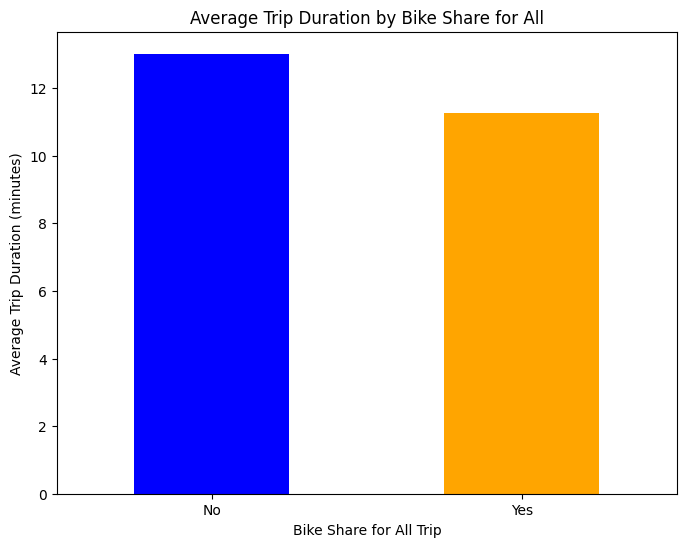

In [37]:
plt.figure(figsize=(8, 6))
# Create a bar plot to compare average trip durations
triptime.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Trip Duration by Bike Share for All')
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Average Trip Duration (minutes)')

# Keep x-axis labels horizontal for better readability
plt.xticks(rotation=0)
plt.show()

# How many round trips (Start Station = End Station) are there?

In [38]:
# Count the number of trips between each start and end station
df.groupby('start_station_name')['end_station_name'].value_counts()

# Filter for round trips where the start and end stations are the same
round_trip=df.loc[df['start_station_name'] == df['end_station_name']]
round_trip.shape[0]

5202

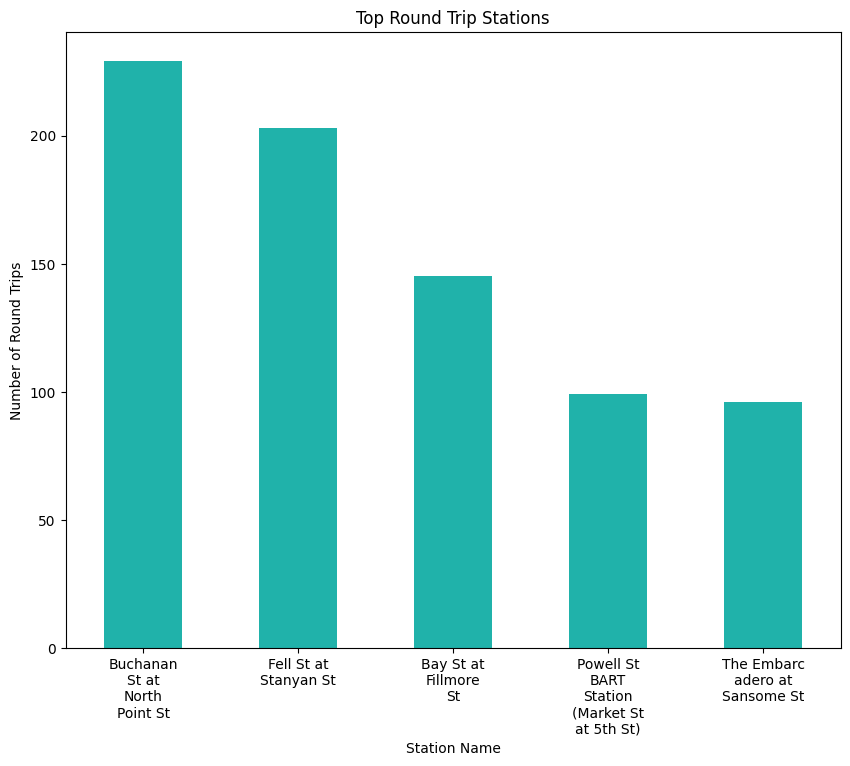

In [39]:
# Get the top 5 stations where round trips (start and end at the same station) occurred the most
round_trip_counts = round_trip['start_station_name'].value_counts().head(5)

# Format station names for better readability in the chart
formatted_labels = ['\n'.join(textwrap.wrap(str(x), width=10)) for x in round_trip_counts.index]

# Plot a bar chart for the most frequent round trip stations
plt.figure(figsize=(10, 8))
round_trip_counts.plot(kind='bar', color='lightseagreen')
plt.title('Top Round Trip Stations')
plt.xlabel('Station Name')
plt.ylabel('Number of Round Trips')

# Adjust x-axis labels for better visibility
plt.xticks(ticks=range(len(formatted_labels)), labels=formatted_labels, rotation=0, ha='center', fontsize=10)
plt.show()


# Average Age of members

In [40]:
# Average age of all members
df['Age'].mean()

40.13755222780099

In [41]:
# Convert the 'Age' column to integer type for better handling
df['Age'] = df['Age'].astype('Int64')

# Function to categorize users into age groups
def age_category(Age):
    if Age < 20:
        return "Teenagers"
    elif Age < 30:
        return "Young Adults"
    elif Age < 40:
        return "Middle-Aged Adults"
    else:
        return "Older Adults"

# Apply the function to create a new 'age_category' column
df['age_category'] = df['Age'].apply(age_category)

In [42]:
# Count the number of users in each age category
df['age_category'].value_counts()

,count
age_category,
Middle-Aged Adults,113599
Older Adults,95358
Young Adults,18891


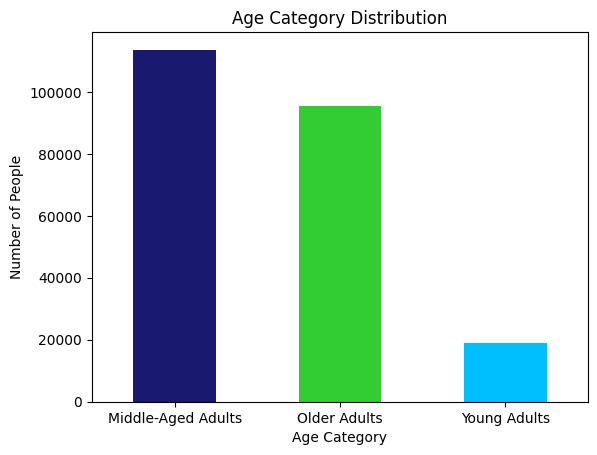

In [43]:
# Visualize the distribution of users across different age categories
df['age_category'].value_counts().plot(kind='bar', color=['midnightblue', 'limegreen', 'deepskyblue', 'red'])
plt.title('Age Category Distribution')
plt.xlabel('Age Category')
plt.ylabel('Number of People')
plt.xticks(rotation=0)

plt.show()

# Does duration get affected by memebers age?


In [44]:
# Compute the correlation between Age and Trip Duration to analyze their relationship
df[['Age', 'duration_in_minutes']].corr()

,Age,duration_in_minutes
Age,1.000000,0.004507
duration_in_minutes,0.004507,1.000000


# Handling Outliers

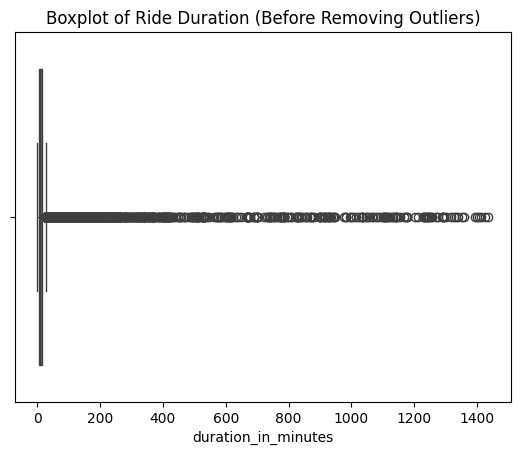

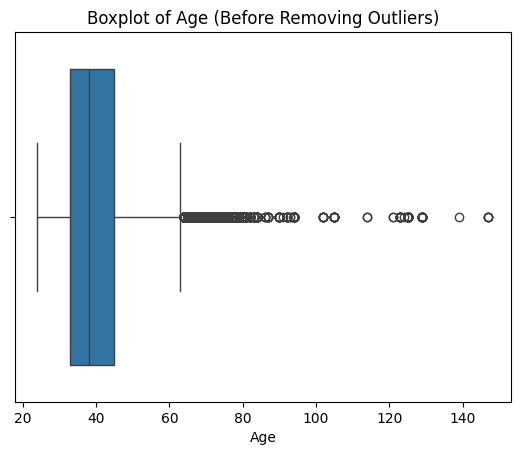

In [45]:
# Visualize the distribution and detect outliers in ride duration
sns.boxplot(x=df['duration_in_minutes'])
plt.title("Boxplot of Ride Duration (Before Removing Outliers)")
plt.show()

# Visualize the distribution and detect outliers in age
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age (Before Removing Outliers)")
plt.show()

In [46]:
# Calculate interquartile range (IQR) to detect outliers in ride duration
Q1 = df['duration_in_minutes'].quantile(0.25)
Q3 = df['duration_in_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['duration_in_minutes'] < lower_bound) | (df['duration_in_minutes'] > upper_bound)]
len(outliers), df.shape

(12414, (227848, 16))

In [47]:
# View the extreme values (outliers)
outliers['duration_in_minutes'].describe()

,duration_in_minutes
count,12414.000000
mean,62.733833
std,117.221546
min,27.400000
25%,30.550000
50%,36.316667
75%,48.333333
max,1435.233333


In [48]:
# Get the minimum trip duration, maximum age, and dataset dimensions
df['duration_in_minutes'].min(), df['Age'].max(), df.shape

(1.0166666666666666, 147, (227848, 16))

In [49]:
# Function to drop outliers using the IQR method
def drop_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply function to drop outliers in duration_in_minutes using IQR
df = drop_outliers(df, 'duration_in_minutes')

# Drop outliers for Age (keeping valid values between 14 and 100)
df = df[(df['Age'] >= 14) & (df['Age'] <= 100)]

# Reset index
df.reset_index(drop=True, inplace=True)


In [50]:
# Check dataset shape after dropping outliers
df.shape

(215331, 16)

In [51]:
# View updated summary statistics
df[['duration_in_minutes', 'Age']].describe()


,duration_in_minutes,Age
count,215331.000000,215331.0
mean,9.987895,40.088766
std,5.651545,9.73441
min,1.016667,24.0
25%,5.600000,33.0
50%,8.800000,38.0
75%,13.300000,45.0
max,27.383333,94.0


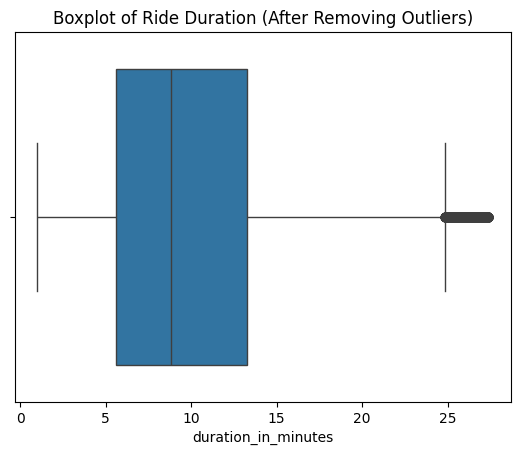

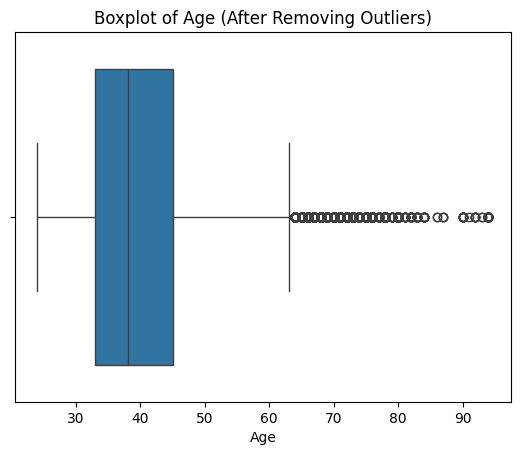

In [52]:
# Visualize the distribution of 'duration_in_minutes' and 'Age' after removing outliers
sns.boxplot(x=df['duration_in_minutes'])
plt.title("Boxplot of Ride Duration (After Removing Outliers)")
plt.show()

sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age (After Removing Outliers)")
plt.show()

In [53]:
# Apply a stricter IQR method to remove outliers for 'duration_in_minutes' and 'Age'
def drop_outliers_strict(df, column, factor=1.2):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = drop_outliers_strict(df, 'duration_in_minutes')
df = drop_outliers_strict(df, 'Age')

# Reset index
df.reset_index(drop=True, inplace=True)


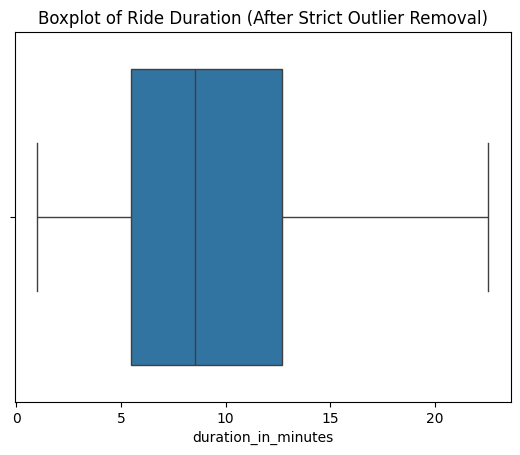

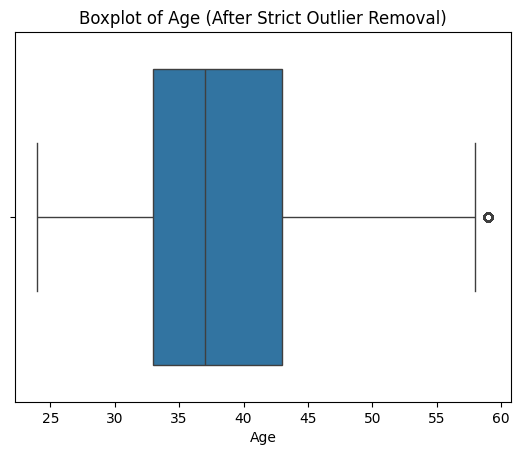

In [54]:
# Boxplot for ride duration after stricter outlier removal
sns.boxplot(x=df['duration_in_minutes'])
plt.title("Boxplot of Ride Duration (After Strict Outlier Removal)")
plt.show()
# Boxplot for Age after stricter outlier removal
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age (After Strict Outlier Removal)")
plt.show()


In [55]:
# Recalculate IQR and check if outliers remain
Q1 = df['duration_in_minutes'].quantile(0.25)
Q3 = df['duration_in_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count remaining outliers
outliers = df[(df['duration_in_minutes'] < lower_bound) | (df['duration_in_minutes'] > upper_bound)]
len(outliers)

0